In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


In [2]:
# Load the data
df = pd.read_csv('data.csv')
print(f"Data loaded successfully! Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display basic information
print("=== DATASET OVERVIEW ===")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print("\n=== COLUMN NAMES ===")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== FIRST 5 ROWS ===")
display(df.head())

Data loaded successfully! Shape: (322641, 9)
Memory usage: 143.94 MB
=== DATASET OVERVIEW ===
Number of rows: 322,641
Number of columns: 9

=== COLUMN NAMES ===
1. Unnamed: 0
2. review_id
3. pseudo_author_id
4. author_name
5. review_text
6. review_rating
7. review_likes
8. author_app_version
9. review_timestamp

=== DATA TYPES ===
Unnamed: 0             int64
review_id             object
pseudo_author_id      object
author_name           object
review_text           object
review_rating          int64
review_likes           int64
author_app_version    object
review_timestamp      object
dtype: object

=== FIRST 5 ROWS ===


,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,152618553977019693742,A Google user,Well designed app. It's much easier to use tha...,5,0,1.0.3,2011-04-07 15:57:52
1,1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,234382942865437071667,A Google user,Cool!,5,1,1.0.0,2011-04-07 15:59:50
2,2,bbae055c-f20b-4c01-b604-7cea72416a3a,174473604608358796368,A Google user,Great to finally see this on the market!,5,0,2.0.5,2011-04-07 16:16:02
3,3,38a13596-b208-423d-8d96-3199e1993138,286593453219054880269,A Google user,Great app,5,1,1.0.0,2011-04-07 16:22:27
4,4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,167276875678680630145,A Google user,Finally! Would love a Homeycomb specific versi...,4,0,1.0.0,2011-04-07 17:41:58


=== MISSING VALUES ANALYSIS ===
               Column  Missing_Count  Missing_Percentage
4         review_text           1716            0.531860
7  author_app_version          67006           20.767974


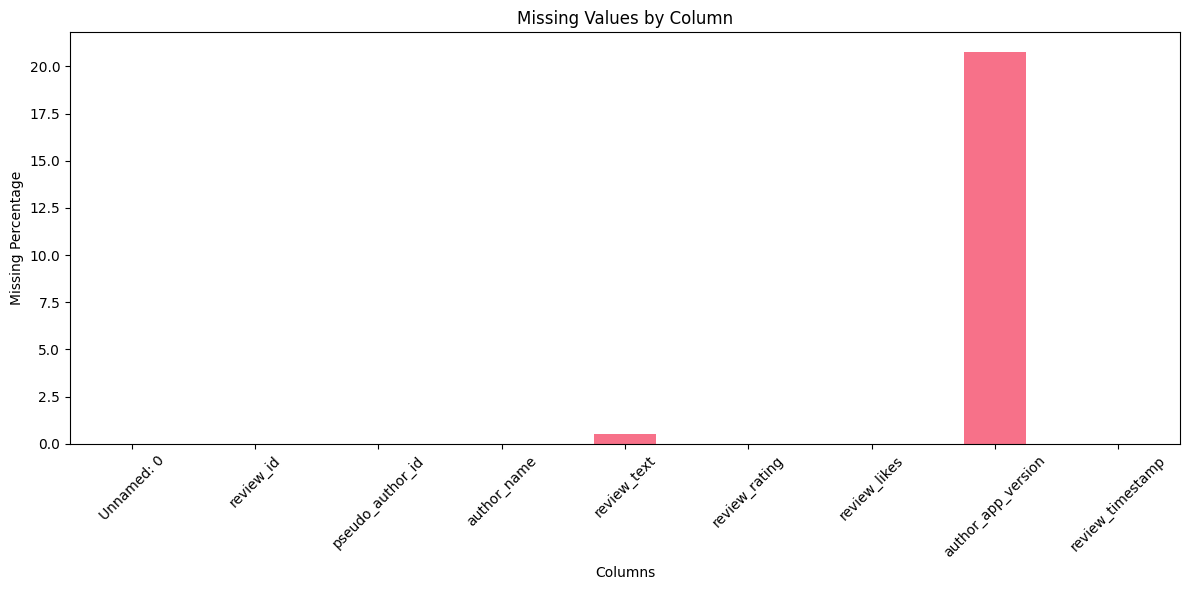

In [3]:
# Check for missing values
print("=== MISSING VALUES ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})

print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
print("=== DATA QUALITY ANALYSIS ===")

# Review ID analysis
print("\n1. Review ID Analysis:")
print(f"   - Unique review IDs: {df['review_id'].nunique()}")
print(f"   - Total rows: {len(df)}")
print(f"   - Duplicate review IDs: {df['review_id'].duplicated().sum()}")

# Author analysis
print("\n2. Author Analysis:")
print(f"   - Unique authors: {df['pseudo_author_id'].nunique()}")
print(f"   - Most common author name: {df['author_name'].mode().iloc[0]}")
print(f"   - Reviews per author (avg): {len(df) / df['pseudo_author_id'].nunique():.2f}")

# Rating analysis
print("\n3. Rating Analysis:")
print(f"   - Rating range: {df['review_rating'].min()} - {df['review_rating'].max()}")
print(f"   - Average rating: {df['review_rating'].mean():.2f}")
print(f"   - Rating distribution:")
print(df['review_rating'].value_counts().sort_index())

# Review text analysis
print("\n4. Review Text Analysis:")
df['review_length'] = df['review_text'].str.len()
print(f"   - Average review length: {df['review_length'].mean():.2f} characters")
print(f"   - Min review length: {df['review_length'].min()} characters")
print(f"   - Max review length: {df['review_length'].max()} characters")
print(f"   - Empty reviews: {(df['review_length'] == 0).sum()}")

# Timestamp analysis
print("\n5. Timestamp Analysis:")
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'], errors='coerce')
print(f"   - Date range: {df['review_timestamp'].min()} to {df['review_timestamp'].max()}")
print(f"   - Invalid timestamps: {df['review_timestamp'].isnull().sum()}")

=== DATA QUALITY ANALYSIS ===

1. Review ID Analysis:
   - Unique review IDs: 322641
   - Total rows: 322641
   - Duplicate review IDs: 0

2. Author Analysis:
   - Unique authors: 322641
   - Most common author name: A Google user
   - Reviews per author (avg): 1.00

3. Rating Analysis:
   - Rating range: 0 - 5
   - Average rating: 3.97
   - Rating distribution:
review_rating
0         1
1     47991
2     14924
3     22481
4     49273
5    187971
Name: count, dtype: int64

4. Review Text Analysis:
   - Average review length: 52.03 characters
   - Min review length: 1.0 characters
   - Max review length: 4092.0 characters
   - Empty reviews: 0

5. Timestamp Analysis:
   - Date range: 2011-04-07 15:57:52 to 2023-11-18 04:06:49
   - Invalid timestamps: 0


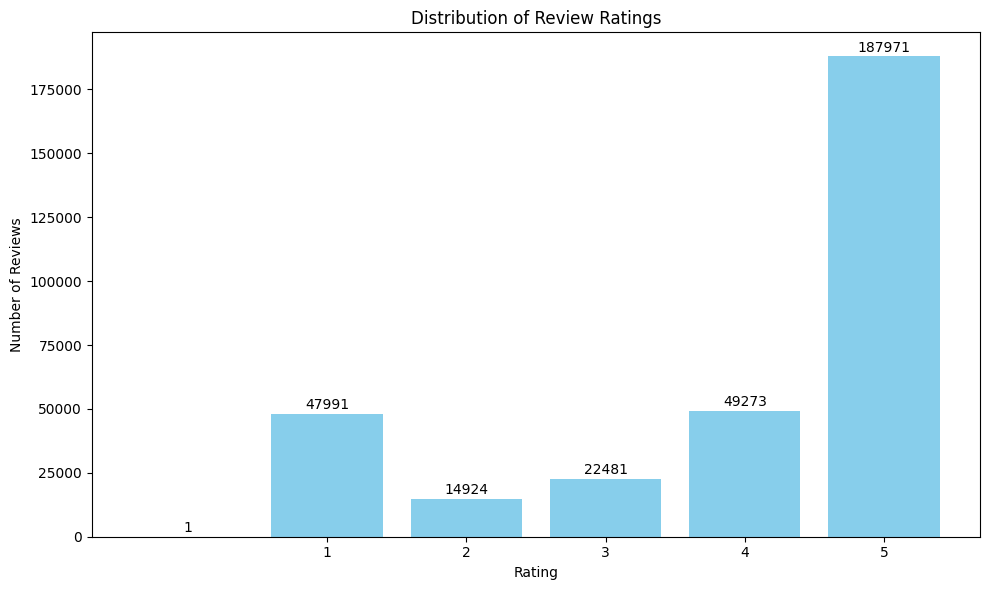

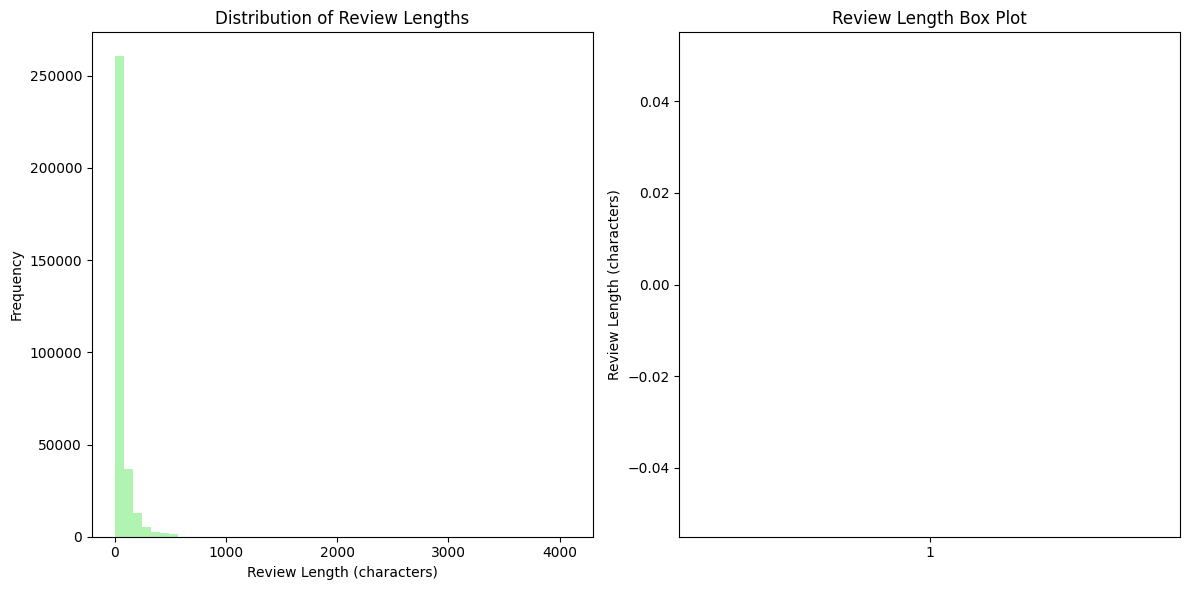

In [5]:
# Visualize rating distribution
plt.figure(figsize=(10, 6))
rating_counts = df['review_rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
for i, v in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], v + max(rating_counts.values)*0.01, str(v), ha='center')
plt.tight_layout()
plt.show()

# Visualize review length distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['review_length'], bins=50, alpha=0.7, color='lightgreen')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['review_length'])
plt.title('Review Length Box Plot')
plt.ylabel('Review Length (characters)')
plt.tight_layout()
plt.show()

In [6]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Original shape: {df_clean.shape}")

# Step 1: Remove duplicate review IDs
duplicates_before = df_clean['review_id'].duplicated().sum()
df_clean = df_clean.drop_duplicates(subset=['review_id'])
print(f"Removed {duplicates_before} duplicate review IDs")

# Step 2: Handle missing values
print("\n=== HANDLING MISSING VALUES ===")
for col in df_clean.columns:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values")
        # For text columns, fill with appropriate placeholder
        if col in ['review_text', 'author_name']:
            df_clean[col] = df_clean[col].fillna('Unknown')
        # For numeric columns, fill with median
        elif col in ['review_rating', 'review_likes']:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
        # For timestamp, drop rows with missing timestamps
        elif col == 'review_timestamp':
            df_clean = df_clean.dropna(subset=[col])

print(f"Shape after handling missing values: {df_clean.shape}")

# Step 3: Clean review text
print("=== CLEANING REVIEW TEXT ===")
df_clean['review_text'] = df_clean['review_text'].str.strip()
short_reviews_before = (df_clean['review_text'].str.len() < 3).sum()
df_clean = df_clean[df_clean['review_text'].str.len() >= 3]
print(f"Removed {short_reviews_before} reviews with less than 3 characters")

def is_meaningful_text(text):
    if pd.isna(text):
        return False
    cleaned = re.sub(r'[^a-zA-Z0-9\\s]', '', str(text))
    return len(cleaned.strip()) > 0

meaningful_before = (~df_clean['review_text'].apply(is_meaningful_text)).sum()
df_clean = df_clean[df_clean['review_text'].apply(is_meaningful_text)]
print(f"Removed {meaningful_before} reviews with no meaningful text")
print(f"Shape after text cleaning: {df_clean.shape}")

# Step 4: Clean and validate ratings
print("=== CLEANING RATINGS ===")
invalid_ratings_before = ((df_clean['review_rating'] < 1) | (df_clean['review_rating'] > 5)).sum()
df_clean = df_clean[(df_clean['review_rating'] >= 1) & (df_clean['review_rating'] <= 5)]
print(f"Removed {invalid_ratings_before} reviews with invalid ratings")
df_clean['review_rating'] = df_clean['review_rating'].astype(int)
print(f"Shape after rating cleaning: {df_clean.shape}")

# Step 5: Clean timestamps
print("=== CLEANING TIMESTAMPS ===")
df_clean['review_timestamp'] = pd.to_datetime(df_clean['review_timestamp'], errors='coerce')
invalid_timestamps = df_clean['review_timestamp'].isnull().sum()
df_clean = df_clean.dropna(subset=['review_timestamp'])
print(f"Removed {invalid_timestamps} reviews with invalid timestamps")
df_clean['review_year'] = df_clean['review_timestamp'].dt.year
df_clean['review_month'] = df_clean['review_timestamp'].dt.month
df_clean['review_day'] = df_clean['review_timestamp'].dt.day
print(f"Shape after timestamp cleaning: {df_clean.shape}")

# Step 6: Clean review likes
print("=== CLEANING REVIEW LIKES ===")
negative_likes = (df_clean['review_likes'] < 0).sum()
df_clean['review_likes'] = df_clean['review_likes'].clip(lower=0)
print(f"Fixed {negative_likes} reviews with negative likes")
df_clean['review_likes'] = df_clean['review_likes'].astype(int)
print(f"Shape after likes cleaning: {df_clean.shape}")

Original shape: (322641, 10)
Removed 0 duplicate review IDs

=== HANDLING MISSING VALUES ===
review_text: 1716 missing values
author_app_version: 67006 missing values
review_length: 1716 missing values
Shape after handling missing values: (322641, 10)
=== CLEANING REVIEW TEXT ===
Removed 5524 reviews with less than 3 characters
Removed 2676 reviews with no meaningful text
Shape after text cleaning: (314441, 10)
=== CLEANING RATINGS ===
Removed 1 reviews with invalid ratings
Shape after rating cleaning: (314440, 10)
=== CLEANING TIMESTAMPS ===
Removed 0 reviews with invalid timestamps
Shape after timestamp cleaning: (314440, 13)
=== CLEANING REVIEW LIKES ===
Fixed 0 reviews with negative likes
Shape after likes cleaning: (314440, 13)


In [7]:
print("=== FINAL DATA QUALITY CHECK ===")
print(f"Final dataset shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")
print(f"Removal percentage: {((len(df) - len(df_clean)) / len(df)) * 100:.2f}%")

print("\n=== MISSING VALUES AFTER CLEANING ===")
missing_after = df_clean.isnull().sum()
print(missing_after[missing_after > 0] if missing_after.sum() > 0 else "No missing values!")

print("\n=== DATA TYPES AFTER CLEANING ===")
print(df_clean.dtypes)

print("\n=== SAMPLE OF CLEANED DATA ===")
display(df_clean.head())

=== FINAL DATA QUALITY CHECK ===
Final dataset shape: (314440, 13)
Rows removed: 8201
Removal percentage: 2.54%

=== MISSING VALUES AFTER CLEANING ===
author_app_version    64891
review_length          1716
dtype: int64

=== DATA TYPES AFTER CLEANING ===
Unnamed: 0                     int64
review_id                     object
pseudo_author_id              object
author_name                   object
review_text                   object
review_rating                  int64
review_likes                   int64
author_app_version            object
review_timestamp      datetime64[ns]
review_length                float64
review_year                    int32
review_month                   int32
review_day                     int32
dtype: object

=== SAMPLE OF CLEANED DATA ===


,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,review_length,review_year,review_month,review_day
0,0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,152618553977019693742,A Google user,Well designed app. It's much easier to use tha...,5,0,1.0.3,2011-04-07 15:57:52,73.0,2011,4,7
1,1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,234382942865437071667,A Google user,Cool!,5,1,1.0.0,2011-04-07 15:59:50,5.0,2011,4,7
2,2,bbae055c-f20b-4c01-b604-7cea72416a3a,174473604608358796368,A Google user,Great to finally see this on the market!,5,0,2.0.5,2011-04-07 16:16:02,40.0,2011,4,7
3,3,38a13596-b208-423d-8d96-3199e1993138,286593453219054880269,A Google user,Great app,5,1,1.0.0,2011-04-07 16:22:27,9.0,2011,4,7
4,4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,167276875678680630145,A Google user,Finally! Would love a Homeycomb specific versi...,4,0,1.0.0,2011-04-07 17:41:58,56.0,2011,4,7


In [8]:
output_filename = 'data_cleaned.csv'
df_clean.to_csv(output_filename, index=False)
print(f"Cleaned data saved to {output_filename}")
print(f"File size: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Cleaned data saved to data_cleaned.csv
File size: 130.98 MB


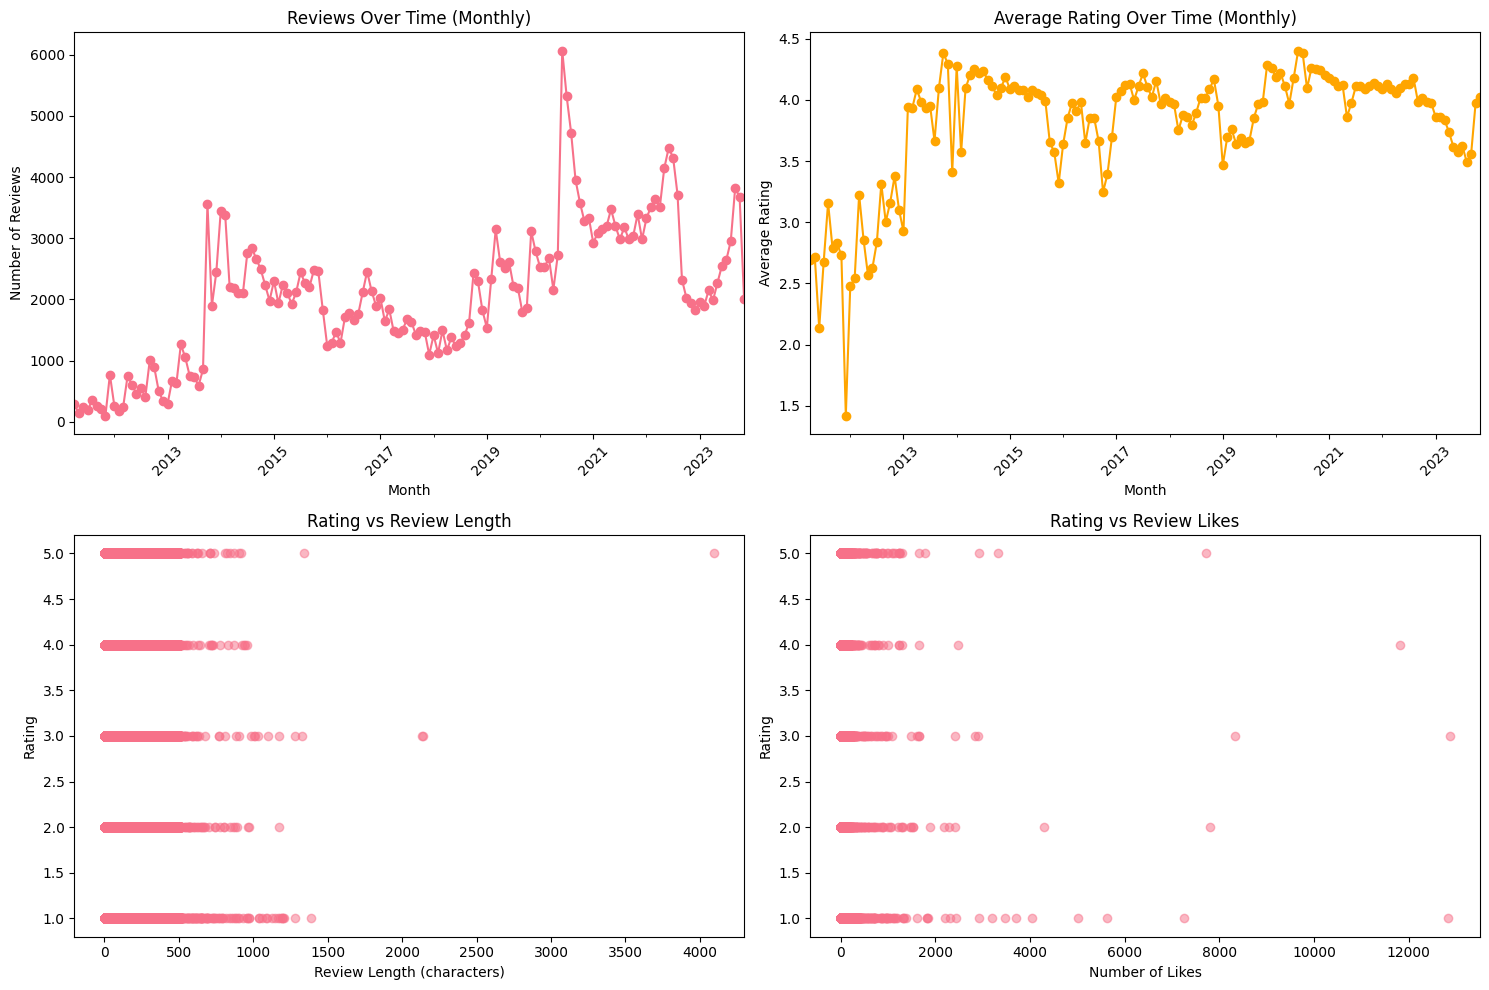

In [9]:
# Time series analysis of reviews
plt.figure(figsize=(15, 10))

# Reviews over time
plt.subplot(2, 2, 1)
monthly_reviews = df_clean.groupby(df_clean['review_timestamp'].dt.to_period('M')).size()
monthly_reviews.plot(kind='line', marker='o')
plt.title('Reviews Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# Average rating over time
plt.subplot(2, 2, 2)
monthly_ratings = df_clean.groupby(df_clean['review_timestamp'].dt.to_period('M'))['review_rating'].mean()
monthly_ratings.plot(kind='line', marker='o', color='orange')
plt.title('Average Rating Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Rating vs Review Length
plt.subplot(2, 2, 3)
plt.scatter(df_clean['review_length'], df_clean['review_rating'], alpha=0.5)
plt.title('Rating vs Review Length')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')

# Rating vs Likes
plt.subplot(2, 2, 4)
plt.scatter(df_clean['review_likes'], df_clean['review_rating'], alpha=0.5)
plt.title('Rating vs Review Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()